# GPT-2

In [1]:
import os
import pandas as pd
import pickle
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Sample examples with explanations, predictions and scores

In [2]:
data_save_dir = "/cluster/home/kamara/syntax-shap/data"
batch_size = 64

dataset = "generics"
model_name = "gpt2"
threshold_ = 0.5
seed_ = 0


#filter_ids_path = os.path.join(data_save_dir, f"{dataset}")
#with open(os.path.join(filter_ids_path, f"{dataset}_{model_name}_stats.pkl"), "rb") as f:
    #stats = pickle.load(f)

#print("Size of the dataset:", stats["n_data"])
#print("Size of filtered dataset:", stats["n_filtered"])
#print("Maximum number of batches:", stats["n_filtered"]//batch_size)

In [5]:

folder_path = f"/cluster/work/zhang/kamara/syntax-shap/results/explanations/{model_name}/{dataset}"  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-4]
            model_name = parts[-3]
            algorithm = parts[-2]
            seed = parts[-1].split('.pkl')[0]  # Removes the file extension
           
            if eval(seed) == seed_:
                # Construct the full file path
                file_path = os.path.join(folder_path, file)

                # Read the pickle file
                with open(full_path, 'rb') as file:
                    data = pickle.load(file)

                # Assuming the content is a dictionary, create a DataFrame
                df = pd.DataFrame(data)
                # Add the extracted details as new columns
                df['algorithm'] = algorithm
                df['n_token'] = df['token_ids'].apply(len)
                df['explanation'] = df['explanation'].apply(lambda x: x.reshape(-1))

                # Append to the list of dataframes
                df_list.append(df)

# Concatenate all dataframes in the list
df_explanation = pd.concat(df_list, ignore_index=True)
df_explanation


,input_id,input,tokens,token_ids,explanation,algorithm,n_token
0,1646,Her grade point average was going to drop if s...,"[Her, grade, point, average, was, going, ...","[9360, 9559, 966, 2811, 373, 1016, 284, 4268, ...","[-0.38811466, 3.968054, 1.0491575, 4.0403643, ...",svsampling,13
1,1864,His holiday in the sun was such a contrast to ...,"[His, holiday, in, the, sun, was, such, ...","[6653, 9912, 287, 262, 4252, 373, 884, 257, 62...","[0.12567626, 0.5253042, 0.7615924, 0.284552, 2...",svsampling,14
2,1570,She was surprised to find that her writing sti...,"[She, was, surprised, to, find, that, he...","[3347, 373, 6655, 284, 1064, 326, 607, 3597, 9...","[0.35867256, 0.8315451, 1.0716178, -0.15281172...",svsampling,12
3,579,Phil wished he had listened to his,"[Phil, wished, he, had, listened, to, his]","[18673, 16555, 339, 550, 16399, 284, 465]","[0.34417456, 0.8079623, 1.1937147, 0.874765, -...",svsampling,7
4,1915,I got to play a solo for our concert at the en...,"[I, got, to, play, a, solo, for, our, ...","[40, 1392, 284, 711, 257, 12199, 329, 674, 100...","[-0.29539347, 0.57355356, 0.7724185, 2.0029593...",svsampling,14
...,...,...,...,...,...,...,...
12731,1761,She was watching intently as the clowns all ca...,"[She, was, watching, int, ently, as, the,...","[3347, 373, 4964, 493, 1473, 355, 262, 25573, ...","[0.0717784784097495, 0.041455605363768806, 0.0...",syntax,15
12732,362,Her Mom bought her a night,"[Her, Mom, bought, her, a, night]","[9360, 11254, 5839, 607, 257, 1755]","[0.17060079072560122, 0.01540764827313529, 0.2...",syntax,6
12733,539,Tina wanted to go to the theme,"[T, ina, wanted, to, go, to, the, theme]","[51, 1437, 2227, 284, 467, 284, 262, 7505]","[0.011376006650588504, 0.026028015216378125, 0...",syntax,8
12734,560,I ended up shooting my best score,"[I, ended, up, shooting, my, best, score]","[40, 4444, 510, 4395, 616, 1266, 4776]","[0.17469026918866912, 0.090587111572812, 0.058...",syntax,7


In [13]:
#### Select rows which input_ids are in the list of input_ids of the rows with algorithm = 'shap'

# Extract input_id values where algorithm is 'shap'
#shap_input_ids = df_explanation[df_explanation['algorithm'] == 'shap']['input_id'].unique()

# Filter the DataFrame to keep rows where input_id is in shap_input_ids
#filtered_df_explanation = df_explanation[df_explanation['input_id'].isin(shap_input_ids)]
#filtered_df_explanation

In [6]:

folder_path = f"/cluster/work/zhang/kamara/syntax-shap/results/scores/{model_name}/{dataset}"  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-5]
            model_name = parts[-4]
            algorithm = parts[-3]
            seed = parts[-2]
            threshold = parts[-1].split('.pkl')[0]  # Removes the file extension

            if (eval(threshold) == threshold_) and (eval(seed) == seed_):
                # Construct the full file path
                file_path = os.path.join(folder_path, file)

                # Read the pickle file
                with open(full_path, 'rb') as file:
                    data = pickle.load(file)

                # Assuming the content is a dictionary, create a DataFrame
                df = pd.DataFrame(data)
                # Add the extracted details as new columns
                df['algorithm'] = algorithm
                df['n_token'] = df['token_ids'].apply(len)

                # Append to the list of dataframes
                df_list.append(df)

# Concatenate all dataframes in the list
df_final_single_threshold = pd.concat(df_list, ignore_index=True)
df_final_single_threshold


,fid_keep_rd,fid_keep,fid_rmv,log_odds_keep,acc_at_k,prob_diff_at_k,input_id,input,tokens,token_ids,algorithm,n_token
0,0.010357,0.004275,0.010357,-0.532255,0.8,0.076400,315,I bought my daughter a stuffed,"[I, bought, my, daughter, a, stuffed]","[40, 5839, 616, 4957, 257, 22259]",svsampling,6
1,0.066127,0.039772,0.148388,-0.312005,0.5,0.121003,526,Halfway through I noticed that she was,"[Half, way, through, I, noticed, that, sh...","[31305, 1014, 832, 314, 6810, 326, 673, 373]",svsampling,8
2,0.006197,0.014786,0.014786,-9.601523,0.5,0.205413,1793,Ben placed the chips in his pocket for now and...,"[Ben, placed, the, chips, in, his, pocke...","[11696, 4624, 262, 12014, 287, 465, 10000, 329...",svsampling,13
3,0.005495,0.005495,0.005495,-8.611811,0.4,0.442031,133,Tom began using the drops,"[Tom, began, using, the, drops]","[13787, 2540, 1262, 262, 10532]",svsampling,5
4,-0.136766,0.033667,0.160834,-0.234869,0.4,0.292361,2195,My Dad was not a very good cook so we had a lo...,"[My, Dad, was, not, a, very, good, cook...","[3666, 17415, 373, 407, 257, 845, 922, 4255, 5...",svsampling,15
...,...,...,...,...,...,...,...,...,...,...,...,...
10823,0.056483,0.070562,0.070562,-11.164268,0.0,0.516345,1024,She researched the type of fish she wanted and...,"[She, researched, the, type, of, fish, s...","[3347, 30066, 262, 2099, 286, 5916, 673, 2227,...",syntax,10
10824,0.022190,0.022190,0.010766,-10.007450,0.0,0.559956,808,Rene has just got his driving permit and is,"[R, ene, has, just, got, his, driving, p...","[49, 1734, 468, 655, 1392, 465, 5059, 8749, 29...",syntax,10
10825,0.920855,0.926957,0.812852,-13.739663,0.0,0.973483,151,A police officer pulled me,"[A, police, officer, pulled, me]","[32, 1644, 3818, 5954, 502]",syntax,5
10826,0.175853,0.157669,0.250815,-0.990545,0.5,0.337354,1265,Owing my mom money was worth it for my new gecko,"[O, wing, my, mom, money, was, worth, it...","[46, 5469, 616, 1995, 1637, 373, 2861, 340, 32...",syntax,13


In [5]:
sample = pd.merge(df_explanation, df_final_single_threshold, on=['input', 'input_id', 'algorithm', 'n_token'])
df_str = pd.read_csv(f"/cluster/home/kamara/syntax-shap/data/{dataset}/seed_{seed}/{dataset}_{model_name}_{seed}_predictions.csv")
sample_with_y = pd.merge(sample, df_str, on=['input', 'input_id'])
#sample_with_y.to_csv(f"/cluster/home/kamara/syntax-shap/results/samples_{model_name}_{dataset}_{threshold_}.csv", index=False)

In [6]:
sample_with_y.to_csv(f"/cluster/home/kamara/syntax-shap/results/samples_{model_name}_{dataset}_{threshold_}.csv", index=False)

### N_tokens vs performance

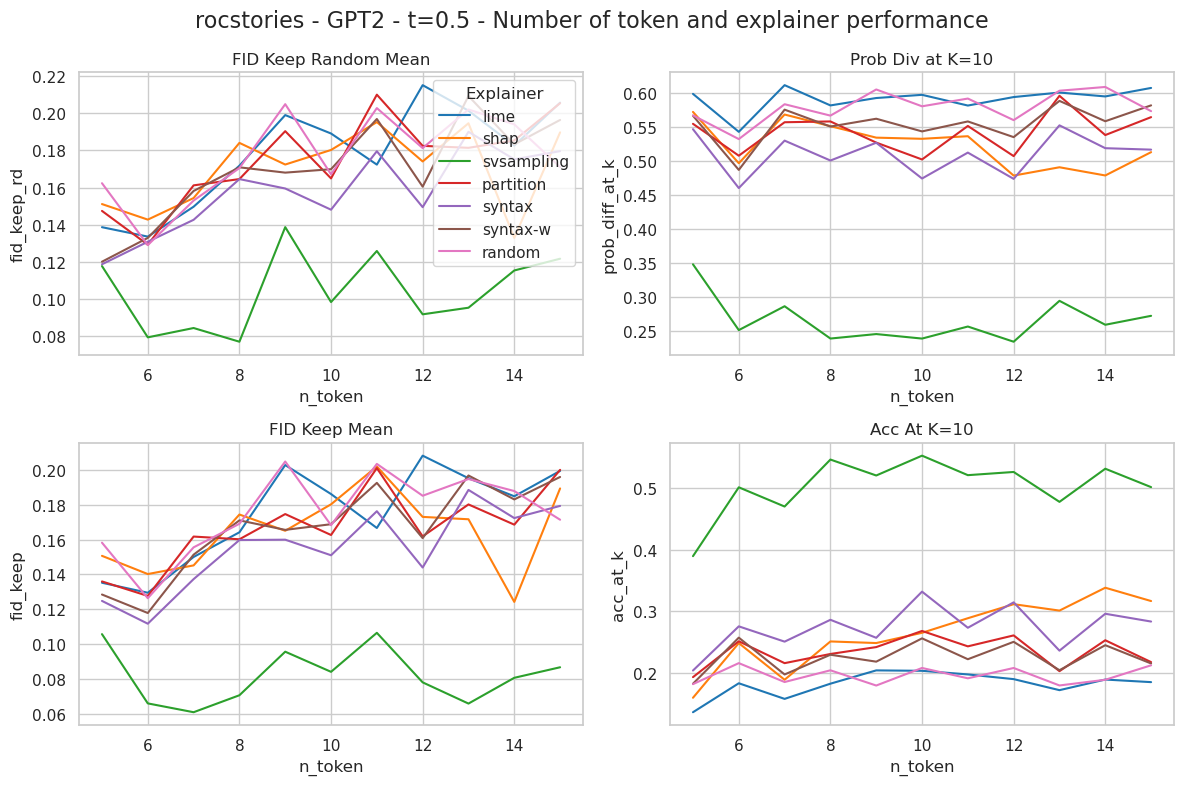

In [7]:
df = df_final_single_threshold.groupby(['algorithm', 'n_token']).mean().reset_index()

# Define the order of algorithms and a colormap
algo_order = ["lime", "shap", "svsampling", "partition", "syntax", "syntax-w", "random"]
palette = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)

# Plotting with Seaborn
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Creating a lineplot for each score
sns.lineplot(x='n_token', y='fid_keep_rd', hue='algorithm', data=df, ax=axes[0, 0], palette=palette)
axes[0, 0].set_title('FID Keep Random Mean')

sns.lineplot(x='n_token', y='fid_keep', hue='algorithm', data=df, ax=axes[1, 0], palette=palette)
axes[1, 0].set_title('FID Keep Mean')

sns.lineplot(x='n_token', y='prob_diff_at_k', hue='algorithm', data=df, ax=axes[0, 1], palette=palette)
axes[0, 1].set_title('Prob Div at K=10')

sns.lineplot(x='n_token', y='acc_at_k', hue='algorithm', data=df, ax=axes[1, 1], palette=palette)
axes[1, 1].set_title('Acc At K=10')

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot
axes[0, 0].legend(title='Explainer', loc='upper right')

fig.suptitle(f'{dataset} - GPT2 - t=0.5 - Number of token and explainer performance', fontsize=16)

plt.tight_layout()
plt.show()

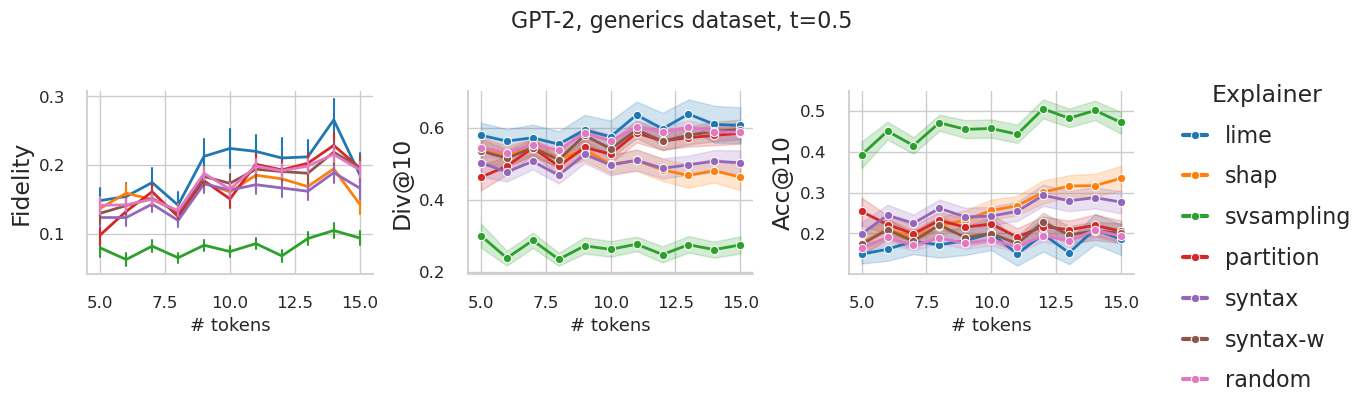

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Grouping and aggregating data
df = df_final_single_threshold#.groupby(['algorithm']).reset_index()#.mean().reset_index()

# Define the order of algorithms and a colormap
algo_order = ["lime", "shap", "svsampling", "partition", "syntax", "syntax-w", "random"]
palette = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)


fig, axes = plt.subplots(1, 3, figsize=(14,3.5))

# Adjusting various parameters
# Plotting with Seaborn
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 15, "ytick.labelsize" : 15})


# Creating a lineplot for each score
sns.lineplot(x='n_token', y='fid_keep', hue='algorithm', data=df, ax=axes[0], palette=palette, linewidth=2, errorbar='se', err_style='bars')
axes[0].set_title('')
axes[0].set_xlabel('# tokens', fontsize=13)
axes[0].set_ylabel('Fidelity', fontsize=17)
axes[0].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='n_token', y='prob_diff_at_k', hue='algorithm', data=df, ax=axes[1], palette=palette, linewidth=2, markers=True, marker='o')
axes[1].set_title('')
axes[1].set_xlabel('# tokens', fontsize=13)
axes[1].set_ylabel('Div@10', fontsize=17)
axes[1].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='n_token', y='acc_at_k', hue='algorithm', data=df, ax=axes[2], palette=palette, linewidth=2, markers=True, marker='o')
axes[2].set_title('')
axes[2].set_xlabel('# tokens', fontsize=13)
axes[2].set_ylabel('Acc@10', fontsize=17)
axes[2].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
legend = axes[2].legend(title='Explainer', loc='upper left', bbox_to_anchor=(1.1, 1.15), fontsize=16, frameon=False, handlelength=1.1, labelspacing=0.8)
legend.get_title().set_fontsize('17')  # Increase legend title font size
for line in legend.get_lines():
    line.set_linewidth(3)  # Increase line width in legend

fig.suptitle(f'GPT-2, {dataset} dataset, t={threshold_}', fontsize=16)  # Adjust suptitle position

sns.despine()
plt.tight_layout()
plt.show()

#fig.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/{dataset}/n_token_vs_perf_{model_name}_{dataset}.pdf", bbox_inches='tight', dpi=600)


### Performance at thresholds

In [3]:

folder_path = f"/cluster/work/zhang/kamara/syntax-shap/results/scores/{model_name}/{dataset}"  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-5]
            model_name = parts[-4]
            algorithm = parts[-3]
            seed = parts[-2]
            threshold = parts[-1].split('.pkl')[0]  # Removes the file extension

            if (eval(seed) == seed_):
                # Construct the full file path
                file_path = os.path.join(folder_path, file)

                # Read the pickle file
                with open(full_path, 'rb') as file:
                    data = pickle.load(file)

                # Assuming the content is a dictionary, create a DataFrame
                df = pd.DataFrame(data)

                # Add the extracted details as new columns
                df['algorithm'] = algorithm
                df['n_token'] = df['token_ids'].apply(len)
                df['threshold'] = eval(threshold)

                # Append to the list of dataframes
                df_list.append(df)

# Concatenate all dataframes in the list
df_final = pd.concat(df_list, ignore_index=True)
df_final


,fid_keep_rd,fid_keep,fid_rmv,log_odds_keep,acc_at_k,prob_diff_at_k,input_id,input,tokens,token_ids,algorithm,n_token,threshold
0,0.014761,0.008814,0.014761,-0.908976,0.2,0.397103,1038,His friend asked him if he had studied for the,"[His, friend, asked, him, if, he, had, ...","[6653, 1545, 1965, 683, 611, 339, 550, 9713, 3...",svsampling,10,0.3
1,0.020704,-0.051180,0.098182,0.419543,0.6,0.432718,77,Jeff gets a bad tooth,"[Jeff, gets, a, bad, tooth]","[19139, 3011, 257, 2089, 16162]",svsampling,5,0.3
2,-0.013020,-0.006504,0.002180,1.381899,0.5,0.406505,632,She rolls all over him and pants a,"[She, rolls, all, over, him, and, pants,...","[3347, 14088, 477, 625, 683, 290, 12581, 257]",svsampling,8,0.3
3,0.024635,0.024635,0.024635,-10.111958,0.2,0.374325,198,They worked hard on their,"[They, worked, hard, on, their]","[2990, 3111, 1327, 319, 511]",svsampling,5,0.3
4,0.031237,0.045087,0.065105,-1.179330,0.1,0.376085,2194,He had gotten lost on a hike and now he was wa...,"[He, had, gotten, lost, on, a, hike, an...","[1544, 550, 7891, 2626, 319, 257, 18390, 290, ...",svsampling,15,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97447,0.055410,0.055410,0.055410,-10.922535,0.0,0.516345,1024,She researched the type of fish she wanted and...,"[She, researched, the, type, of, fish, s...","[3347, 30066, 262, 2099, 286, 5916, 673, 2227,...",syntax,10,0.3
97448,0.011164,0.011164,0.011164,-9.320513,0.0,0.563009,808,Rene has just got his driving permit and is,"[R, ene, has, just, got, his, driving, p...","[49, 1734, 468, 655, 1392, 465, 5059, 8749, 29...",syntax,10,0.3
97449,0.926957,0.926957,0.899180,-13.739663,0.0,0.984117,151,A police officer pulled me,"[A, police, officer, pulled, me]","[32, 1644, 3818, 5954, 502]",syntax,5,0.3
97450,-0.013537,-0.015455,-0.014313,9.645739,0.3,0.637367,1265,Owing my mom money was worth it for my new gecko,"[O, wing, my, mom, money, was, worth, it...","[46, 5469, 616, 1995, 1637, 373, 2861, 340, 32...",syntax,13,0.3


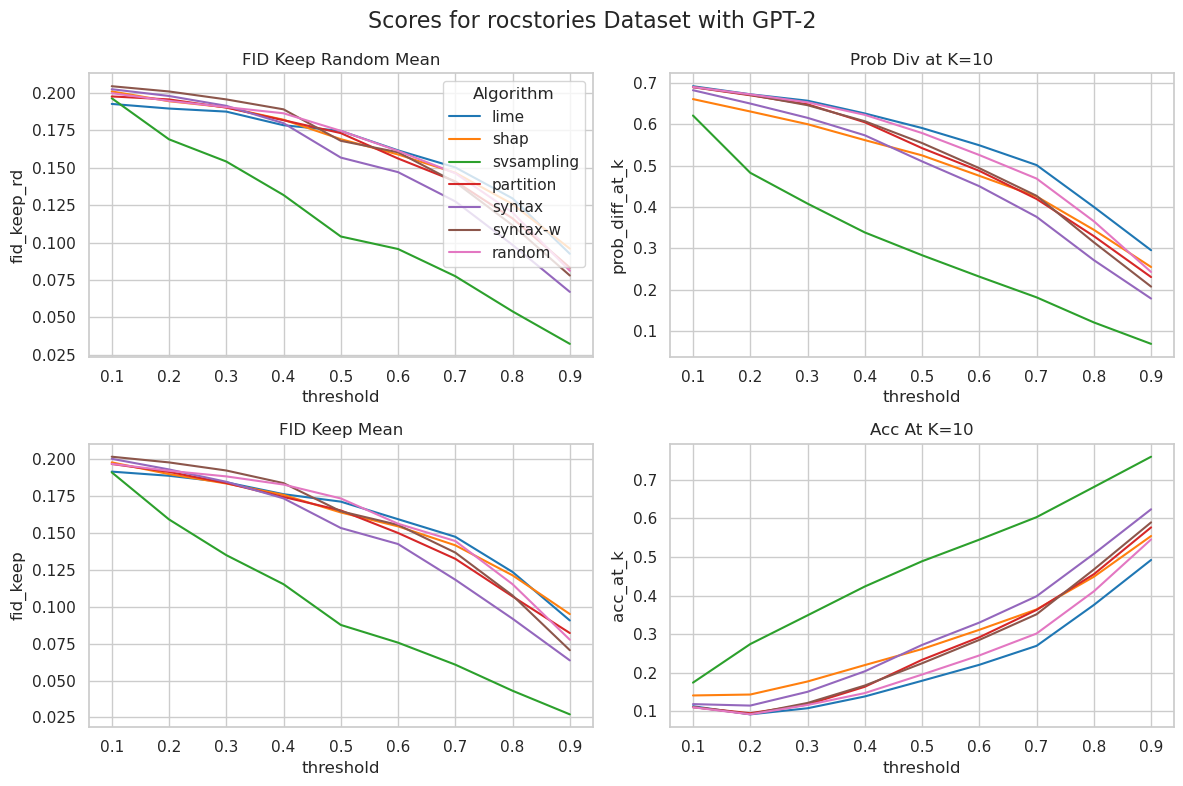

In [4]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = df_final.groupby(['algorithm', 'threshold']).mean().reset_index()
# Define the order of algorithms and a colormap
algo_order = ["lime", "ablation", "shap", "svsampling", "partition", "syntax", "syntax-w", "random"]
palette = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)

# Plotting with Seaborn
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Creating a lineplot for each score
sns.lineplot(x='threshold', y='fid_keep_rd', hue='algorithm', data=df, ax=axes[0, 0], palette=palette)
axes[0, 0].set_title('FID Keep Random Mean')

sns.lineplot(x='threshold', y='fid_keep', hue='algorithm', data=df, ax=axes[1, 0], palette=palette)
axes[1, 0].set_title('FID Keep Mean')

sns.lineplot(x='threshold', y='prob_diff_at_k', hue='algorithm', data=df, ax=axes[0, 1], palette=palette)
axes[0, 1].set_title('Prob Div at K=10')

sns.lineplot(x='threshold', y='acc_at_k', hue='algorithm', data=df, ax=axes[1, 1], palette=palette)
axes[1, 1].set_title('Acc At K=10')

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot
axes[0, 0].legend(title='Algorithm', loc='upper right')

fig.suptitle(f'Scores for {dataset} Dataset with GPT-2', fontsize=16)

plt.tight_layout()
#plt.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/{dataset}/scores_all_{model_name}_{dataset}.pdf", bbox_inches='tight', dpi=600)
plt.show()

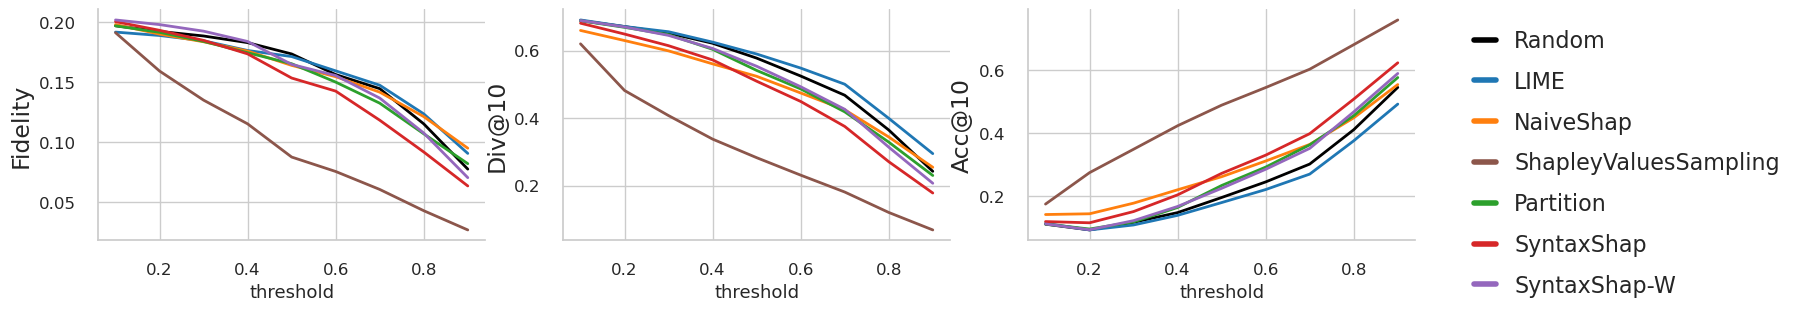

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Grouping and aggregating data
df = df_final.groupby(['algorithm', 'threshold']).mean().reset_index()

# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "ablation", "shap", "svsampling", "partition", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'ablation': 'FeatureAblation', 'shap': 'NaiveShap', 'svsampling': 'ShapleyValuesSampling', 'partition': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "NaiveShap": pal[1], "Partition": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4], "ShapleyValuesSampling": pal[5], "FeatureAblation": pal[6]} 

legend_order = ["Random", "LIME", "FeatureAblation", "NaiveShap", "Partition", "SyntaxShap", "SyntaxShap-W"]

fig, axes = plt.subplots(1, 3, figsize=(17,3))

# Adjusting various parameters
# Plotting with Seaborn
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 15, "ytick.labelsize" : 15})


# Creating a lineplot for each score
sns.lineplot(x='threshold', y='fid_keep', hue='algorithm', data=df, ax=axes[0], palette=dict_color, linewidth=2)
axes[0].set_title('')
axes[0].set_xlabel('threshold', fontsize=13)
axes[0].set_ylabel('Fidelity', fontsize=17)
axes[0].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='threshold', y='prob_diff_at_k', hue='algorithm', data=df, ax=axes[1], palette=dict_color, linewidth=2)
axes[1].set_title('')
axes[1].set_xlabel('threshold', fontsize=13)
axes[1].set_ylabel('Div@10', fontsize=17)
axes[1].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='threshold', y='acc_at_k', hue='algorithm', data=df, ax=axes[2], palette=dict_color, linewidth=2)
axes[2].set_title('')
axes[2].set_xlabel('threshold', fontsize=13)
axes[2].set_ylabel('Acc@10', fontsize=17)
axes[2].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
handles, labels = axes[2].get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order]
ordered_labels = [label for label in legend_order]
legend = axes[2].legend(ordered_handles, ordered_labels, title='', loc='upper left', bbox_to_anchor=(1.1, 1), fontsize=16, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('17')  # Increase legend title font size
for line in legend.get_lines():
    line.set_linewidth(4)  # Increase line width in legend


#fig.suptitle(f'GPT-2, {dataset} dataset', fontsize=16)  # Adjust suptitle position

sns.despine()
#plt.tight_layout()
plt.show()

#fig.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/{dataset}/scores_{model_name}_{dataset}.pdf", bbox_inches='tight', dpi=600)


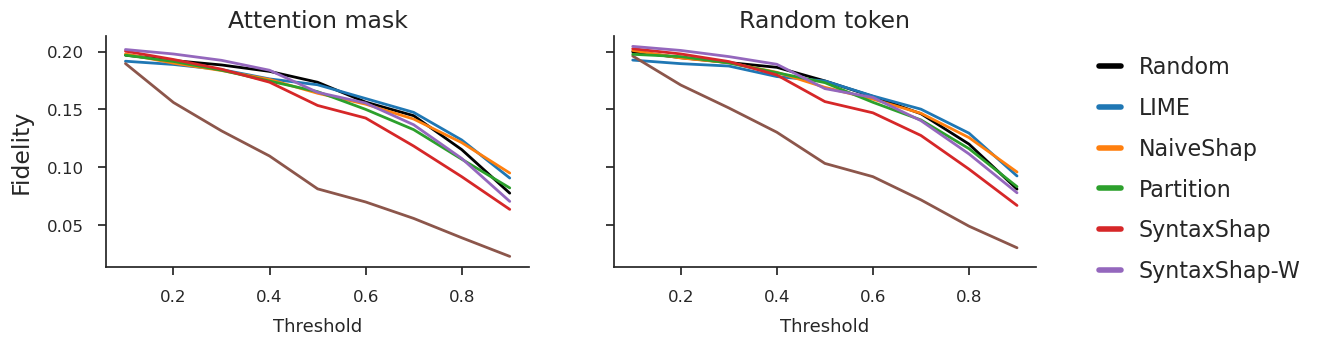

In [11]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping and aggregating data
df = df_final.groupby(['algorithm', 'threshold']).mean().reset_index()

# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "ablation", "shap", "svsampling", "partition", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'ablation': 'FeatureAblation', 'shap': 'NaiveShap', 'svsampling': 'ShapleyValuesSampling', 'partition': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "NaiveShap": pal[1], "Partition": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4], "ShapleyValuesSampling": pal[5], "FeatureAblation": pal[6]} 

legend_order = ["Random", "LIME", "FeatureAblation", "NaiveShap", "ShapleyValuesSampling", "Partition", "SyntaxShap", "SyntaxShap-W"]


fig, axes = plt.subplots(1, 2, figsize=(12,3), sharey=True)

# Adjusting various parameters
# Plotting with Seaborn
sns.set_style("whitegrid")
sns.set_context("notebook", rc={"xtick.labelsize" : 15, "ytick.labelsize" : 15})


# Creating a lineplot for each score
sns.lineplot(x='threshold', y='fid_keep', hue='algorithm', data=df, ax=axes[0], palette=dict_color, linewidth=2)
axes[0].set_title('Attention mask', fontsize=17)
axes[0].set_xlabel('Threshold', fontsize=13, labelpad=10)
axes[0].set_ylabel('Fidelity', fontsize=17, labelpad=10)
axes[0].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='threshold', y='fid_keep_rd', hue='algorithm', data=df, ax=axes[1], palette=dict_color, linewidth=2)
axes[1].set_title('Random token', fontsize=17)
axes[1].set_xlabel('Threshold', fontsize=13, labelpad=10)
axes[1].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
handles, labels = axes[1].get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order]
ordered_labels = [label for label in legend_order]
legend = axes[1].legend(ordered_handles, ordered_labels, title='', loc='upper left', bbox_to_anchor=(1.1, 1), fontsize=16, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('17')  # Increase legend title font size
for line in legend.get_lines():
    line.set_linewidth(4)  # Increase line width in legend

sns.despine()
#plt.tight_layout()

#fig.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/{dataset}/masking_{model_name}_{dataset}_whitegrid.pdf", bbox_inches='tight', dpi=600)
plt.show()

## Statistics analysis

In [11]:

folder_path = f"/cluster/work/zhang/kamara/syntax-shap/results/scores/{model_name}"  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-5]
            model_name = parts[-4]
            algorithm = parts[-3]
            seed = parts[-2]
            threshold = parts[-1].split('.pkl')[0]  # Removes the file extension

            if (eval(seed) == seed_) and (eval(threshold) == threshold_):# and (dataset != 'negation'):
                # Construct the full file path
                file_path = os.path.join(folder_path, file)

                # Read the pickle file
                with open(full_path, 'rb') as file:
                    data = pickle.load(file)

                # Assuming the content is a dictionary, create a DataFrame
                df = pd.DataFrame(data)
                print(df.head())
                print(df.columns)
                # Add the extracted details as new columns
                df['algorithm'] = algorithm
                df['n_token'] = df['tokens'].apply(len)
                df['threshold'] = eval(threshold)
                df['dataset'] = dataset

                # Append to the list of dataframes
                df_list.append(df)

# Concatenate all dataframes in the list
df_final = pd.concat(df_list, ignore_index=True)
df_final


   fid_keep_rd  fid_keep   fid_rmv  log_odds_keep  acc_at_k  prob_diff_at_k  \
0     0.164782  0.062145  0.322326      -0.156747       0.7        0.162612   
1     0.034818  0.003822  0.055353      -0.071546       0.5        0.110891   
2     0.037616  0.031743  0.037616      -1.856843       0.4        0.257295   
3     0.453871  0.292180  0.453871      -1.032125       0.4        0.422216   
4     0.446601  0.442134  0.457057      -3.421868       0.1        0.557758   

   input_id                       input  \
0       172         A bat flies without   
1       464      A dolphin sees without   
2       196      A monkey walks without   
3       414  Peter is a groom without a   
4       530             A person has no   

                                   tokens                            token_ids  
0             [A,  bat,  flies,  without]              [32, 7365, 17607, 1231]  
1          [A,  dolphin,  sees,  without]              [32, 44136, 7224, 1231]  
2          [A,  monkey,

,fid_keep_rd,fid_keep,fid_rmv,log_odds_keep,acc_at_k,prob_diff_at_k,input_id,input,tokens,token_ids,algorithm,n_token,threshold,dataset
0,0.164782,0.062145,0.322326,-0.156747,0.7,0.162612,172,A bat flies without,"[A, bat, flies, without]","[32, 7365, 17607, 1231]",partition,4,0.5,negation
1,0.034818,0.003822,0.055353,-0.071546,0.5,0.110891,464,A dolphin sees without,"[A, dolphin, sees, without]","[32, 44136, 7224, 1231]",partition,4,0.5,negation
2,0.037616,0.031743,0.037616,-1.856843,0.4,0.257295,196,A monkey walks without,"[A, monkey, walks, without]","[32, 21657, 11114, 1231]",partition,4,0.5,negation
3,0.453871,0.292180,0.453871,-1.032125,0.4,0.422216,414,Peter is a groom without a,"[Peter, is, a, groom, without, a]","[19727, 318, 257, 32443, 1231, 257]",partition,6,0.5,negation
4,0.446601,0.442134,0.457057,-3.421868,0.1,0.557758,530,A person has no,"[A, person, has, no]","[32, 1048, 468, 645]",partition,4,0.5,negation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38628,0.204527,0.728985,0.892984,-1.416245,0.2,0.195492,3231,Digital circuits are used for signals that rep...,"[Digital, circuits, are, used, for, signa...","[27640, 24907, 389, 973, 329, 10425, 326, 7830...",syntax,11,0.5,generics
38629,0.546880,0.524004,0.546568,-3.053664,0.1,0.791666,1785,Voltages are compared to the ground to measure,"[V, olt, ages, are, compared, to, the, gr...","[53, 5978, 1095, 389, 3688, 284, 262, 2323, 28...",syntax,10,0.5,generics
38630,0.236790,0.243058,0.252340,-3.302619,0.1,0.924497,3879,Elephants use their large ears to cool themsel...,"[Ele, ph, ants, use, their, large, ears, ...","[28827, 746, 1187, 779, 511, 1588, 11368, 284,...",syntax,14,0.5,generics
38631,0.024435,-0.030068,0.036625,0.599356,0.5,0.185019,1302,Infancy is also a time of brain,"[Inf, ancy, is, also, a, time, of, brain]","[18943, 3883, 318, 635, 257, 640, 286, 3632]",syntax,8,0.5,generics


### Number of tokens

0          0
1          1
2          3
3          4
4          5
        ... 
3567    5361
3568    5368
3569    5370
3570    5373
3571    5388
Name: input_id, Length: 3572, dtype: int64


/tmp/ipykernel_16317/2712828084.py:22: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(data=df, x='n_token', hue='dataset', palette=sns.color_palette("Dark2"), width=0.8, edgecolor='white')


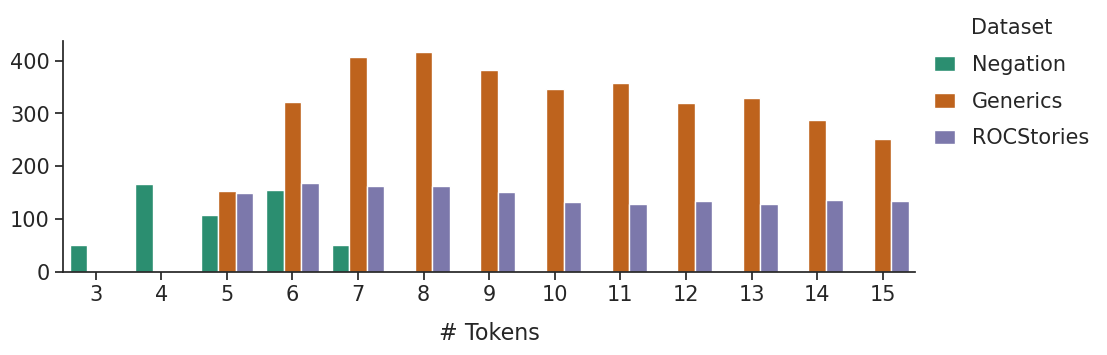

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = df_final[['input_id', 'input', 'n_token', 'dataset']]
df = df.groupby(['dataset', 'input_id']).mean().reset_index()
df['n_token'] = df['n_token'].apply(lambda x: int(x))
print(df[df['dataset'] == 'generics']['input_id'])
order = ['negation', 'generics', 'rocstories']
df = df.sort_values(by='dataset', key=lambda x: x.map({v: i for i, v in enumerate(order)}))
df['dataset'] = df['dataset'].replace({'negation': 'Negation', 'generics': 'Generics', 'rocstories': 'ROCStories'})


# Plotting with Seaborn
sns.set(style="whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 15, "ytick.labelsize" : 15})


# Plotting
plt.figure(figsize=(11, 3))
sns.countplot(data=df, x='n_token', hue='dataset', palette=sns.color_palette("Dark2"), width=0.8, edgecolor='white')
plt.xlabel('# Tokens', fontsize=16, labelpad=12)
plt.ylabel(None)

legend = plt.legend(title='Dataset', loc='upper left', bbox_to_anchor=(1, 1.18), fontsize=15, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('15')  # Increase legend title font size
for line in legend.get_lines():
    line.set_linewidth(4)  # Increase line width in legend

#plt.legend([],[], frameon=False)
sns.despine()

plt.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/scores_{model_name}_n_token_count.pdf", bbox_inches='tight', dpi=600)

plt.show()


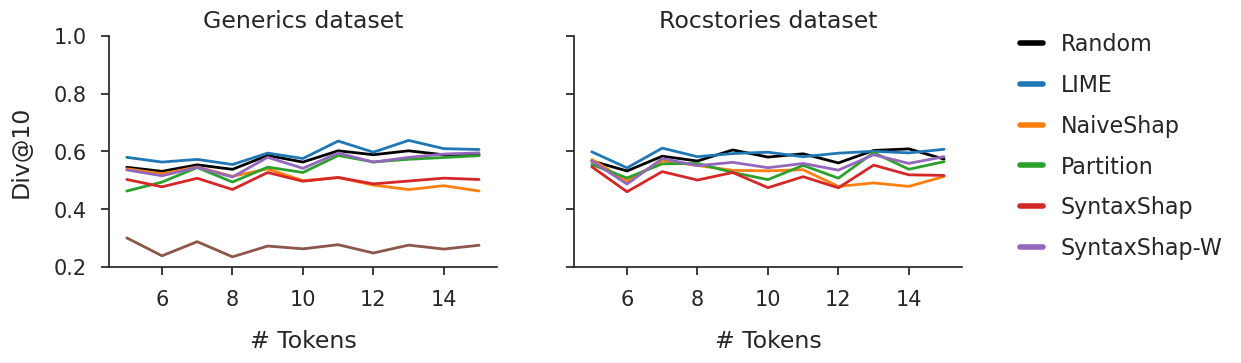

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Grouping and aggregating data
df = df_final.groupby(['algorithm', 'dataset', 'n_token']).mean().reset_index()
df = df[df['dataset'] != 'negation']
df = df[df['n_token'] <= 15]


# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "ablation", "shap", "svsampling", "partition", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'ablation': 'FeatureAblation', 'shap': 'NaiveShap', 'svsampling': 'ShapleyValuesSampling', 'partition': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "NaiveShap": pal[1], "Partition": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4], "ShapleyValuesSampling": pal[5], "FeatureAblation": pal[6]} 

legend_order = ["Random", "LIME", "FeatureAblation", "NaiveShap", "ShapleyValuesSampling", "Partition", "SyntaxShap", "SyntaxShap-W"]

fig, axes = plt.subplots(1, 2, figsize=(11,3), sharey=True)

# Adjusting various parameters
# Plotting with Seaborn
sns.set(style="whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 17, "ytick.labelsize" : 17})


# Creating a lineplot for each score
sns.lineplot(x='n_token', y='prob_diff_at_k', hue='algorithm', data=df[df['dataset']=='generics'], ax=axes[0], palette=dict_color, linewidth=2)#, errorbar='se')#, err_style='bars')
axes[0].set_title('Generics dataset', fontsize=17)
axes[0].set_xlabel('# Tokens', fontsize=17, labelpad=15)
axes[0].set_ylabel('Div@10', fontsize=17, labelpad=15)
axes[0].tick_params(axis='both', which='major', labelsize=15, pad=10)  # Increase tick font size and padding
axes[0].set_ylim(0.2, 1)

sns.lineplot(x='n_token', y='prob_diff_at_k', hue='algorithm', data=df[df['dataset']=='rocstories'], ax=axes[1], palette=dict_color, linewidth=2)#, errorbar='se')#, err_style='bars')
axes[1].set_title('Rocstories dataset', fontsize=17)
axes[1].set_xlabel('# Tokens', fontsize=17, labelpad=15)
axes[1].set_ylabel('Div@10', fontsize=17, labelpad=15)
axes[1].tick_params(axis='both', which='major', labelsize=15, pad=10)  # Increase tick font size and padding

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
handles, labels = axes[1].get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order]
ordered_labels = [label for label in legend_order]
legend = axes[1].legend(ordered_handles, ordered_labels, title='', loc='upper left', bbox_to_anchor=(1.1, 1.1), fontsize=16, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('17')  # Increase legend title font size
for line in legend.get_lines():
    line.set_linewidth(4)  # Increase line width in legend

#fig.suptitle(f'MistralAI 7b, {dataset} dataset', fontsize=16)  # Adjust suptitle position

sns.despine()
#plt.tight_layout()
plt.show()

#fig.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/scores_{model_name}_n_tokens_vs_performance_15tokens_mean.pdf", bbox_inches='tight', dpi=600)


### Dependency distance

In [14]:
import spacy
import textdescriptives as td

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('textdescriptives')

def get_dpdcy_dist(text):
    text = str(text)
    doc = nlp(text)
    dd = doc._.dependency_distance['dependency_distance_mean']
    return dd


/cluster/home/kamara/mambaforge/envs/syntaxshapenv/lib/python3.11/site-packages/torch/cuda/__init__.py:628: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [16]:
df_final['dependency_dist'] = df_final['input'].apply(lambda x: get_dpdcy_dist(x))
df_final.to_csv(f"/cluster/home/kamara/syntax-shap/results/scores_{model_name}_{threshold_}_seed{seed_}.csv", index=False)

In [15]:
df_final = pd.read_csv(f"/cluster/home/kamara/syntax-shap/results/scores_{model_name}_{threshold_}_seed{seed_}.csv")

In [1]:
input = "My father is not a mother"
mask = np.array([0,1,1,0,0,1])
input * (mask).to(input.dtype)

AttributeError: 'list' object has no attribute 'to'

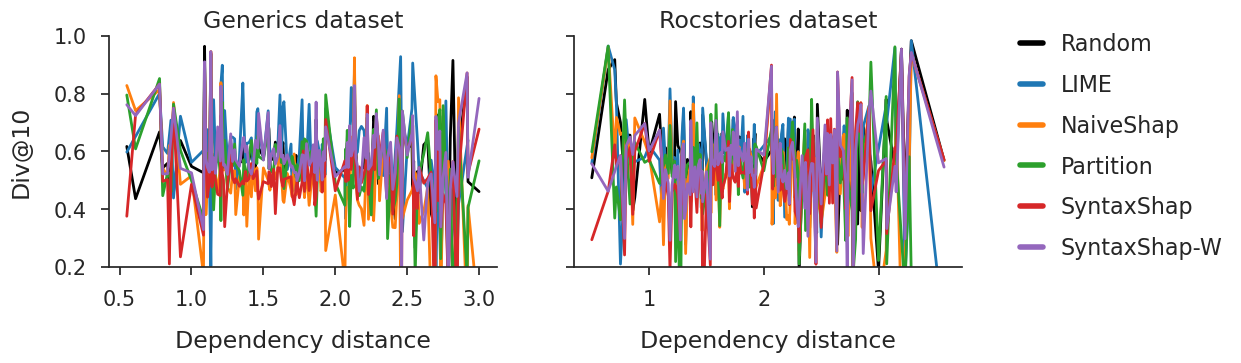

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Grouping and aggregating data
df = df_final.groupby(['algorithm', 'dataset', 'dependency_dist', 'n_token']).mean().reset_index()
df = df[df['dataset'] != 'negation']
df = df[df['n_token'] <= 15]


# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "ablation", "shap", "svsampling", "partition", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'ablation': 'FeatureAblation', 'shap': 'NaiveShap', 'svsampling': 'ShapleyValuesSampling', 'partition': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "NaiveShap": pal[1], "Partition": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4], "ShapleyValuesSampling": pal[5], "FeatureAblation": pal[6]} 

legend_order = ["Random", "LIME", "FeatureAblation", "NaiveShap", "ShapleyValuesSampling", "Partition", "SyntaxShap", "SyntaxShap-W"]


df = df[df['algorithm']=='SyntaxShap']

fig, axes = plt.subplots(1, 2, figsize=(11,3), sharey=True)

# Adjusting various parameters
# Plotting with Seaborn
sns.set(style="whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 17, "ytick.labelsize" : 17})


sns.scatterplot(x='n_token', y='dependency_dist', hue='prob_diff_at_k', data=df[df['dataset']=='generics'], ax=axes[0], palette=sns.color_palette('coolwarm'))#, errorbar='se')#, err_style='bars')
axes[0].set_title('Generics dataset', fontsize=17)
axes[0].set_xlabel('Number of tokens', fontsize=17, labelpad=15)
axes[0].set_ylabel('Dependency distance', fontsize=17, labelpad=15)
axes[0].tick_params(axis='both', which='major', labelsize=15, pad=10)  # Increase tick font size and padding

sns.scatterplot(x='n_token', y='dependency_dist', hue='prob_diff_at_k', data=df[df['dataset']=='rocstories'], ax=axes[0], palette=sns.color_palette('coolwarm'))#, errorbar='se')#, err_style='bars')
axes[0].set_title('ROCStories dataset', fontsize=17)
axes[0].set_xlabel('Number of tokens', fontsize=17, labelpad=15)
axes[0].set_ylabel('Dependency distance', fontsize=17, labelpad=15)
axes[0].tick_params(axis='both', which='major', labelsize=15, pad=10)  # Increase tick font size and padding

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

legend = axes[1].legend(title='Div@10', loc='upper left', bbox_to_anchor=(1.1, 1.1), fontsize=16, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('17')  # Increase legend title font size

#fig.suptitle(f'MistralAI 7b, {dataset} dataset', fontsize=16)  # Adjust suptitle position

sns.despine()
#plt.tight_layout()
plt.show()

#fig.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/scores_{model_name}_dependency_dist_vs_performance.pdf", bbox_inches='tight', dpi=600)


In [18]:
df_final[df_final['dataset'] == 'generics']['dependency_dist'].max()

3.0

bins_generics [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
max generics dpdc dist:  3
bins_rocstories [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
max rocstories dpdc dist:  3


/tmp/ipykernel_16317/3847303570.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_generics['dependency_dist_bin'] = pd.cut(df_generics['dependency_dist'], bins=bins_generics)
/tmp/ipykernel_16317/3847303570.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rocstories['dependency_dist_bin'] = pd.cut(df_rocstories['dependency_dist'], bins=bins_rocstories)
/tmp/ipykernel_16317/3847303570.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or

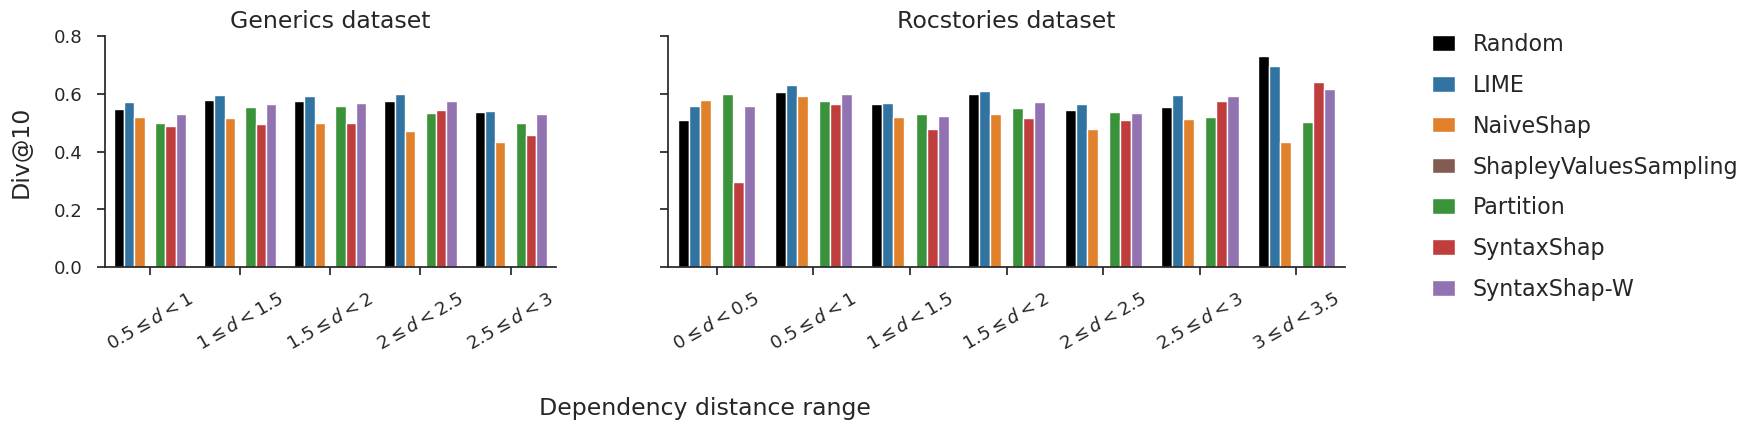

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for illustration

# Define bins for each dataset independently
bins_generics = [x / 2 for x in range(1, int(df_final[df_final['dataset'] == 'generics']['dependency_dist'].max() * 2) + 1)]
bins_rocstories = [x / 2 for x in range(0, int(df_final[df_final['dataset'] == 'rocstories']['dependency_dist'].max() * 2) + 1)]
print('bins_generics', bins_generics)
print('max generics dpdc dist: ', int(df_final[df_final['dataset'] == 'generics']['dependency_dist'].max()))
print('bins_rocstories', bins_rocstories)
print('max rocstories dpdc dist: ', int(df_final[df_final['dataset'] == 'rocstories']['dependency_dist'].max()))

# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "ablation", "shap", "svsampling", "partition", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df = df_final.copy()
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'ablation': 'FeatureAblation', 'shap': 'NaiveShap', 'svsampling': 'ShapleyValuesSampling', 'partition': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "NaiveShap": pal[1], "Partition": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4], "ShapleyValuesSampling": pal[5], "FeatureAblation": pal[6]} 

legend_order = ["Random", "LIME", "FeatureAblation", "NaiveShap", "ShapleyValuesSampling", "Partition", "SyntaxShap", "SyntaxShap-W"]


# Create bins for each dataset
df_generics = df[df['dataset'] == 'generics']
df_generics['dependency_dist_bin'] = pd.cut(df_generics['dependency_dist'], bins=bins_generics)
df_generics = df_generics.groupby(['algorithm', 'dataset', 'dependency_dist_bin']).mean().reset_index()

df_rocstories = df[df['dataset'] == 'rocstories']
df_rocstories['dependency_dist_bin'] = pd.cut(df_rocstories['dependency_dist'], bins=bins_rocstories)
df_rocstories = df_rocstories.groupby(['algorithm', 'dataset', 'dependency_dist_bin']).mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16,3), sharey=True, gridspec_kw={'width_ratios': [1, 1.5]})

# Adjusting various parameters
# Plotting with Seaborn
sns.set(style="whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 17, "ytick.labelsize" : 17})

# Creating a lineplot for each score
sns.barplot(x='dependency_dist_bin', y='prob_diff_at_k', hue='algorithm', data=df_generics, ax=axes[0], palette=dict_color)
axes[0].set_title('Generics dataset', fontsize=17)
axes[0].set_xlabel(None)
axes[0].set_ylabel('Div@10', fontsize=17, labelpad=15)
axes[0].tick_params(axis='both', which='major', labelsize=13, pad=10)
axes[0].set_ylim(0, 0.8)
axes[0].tick_params(axis='x', rotation=30) 

sns.barplot(x='dependency_dist_bin', y='prob_diff_at_k', hue='algorithm', data=df_rocstories, ax=axes[1], palette=dict_color)
axes[1].set_title('Rocstories dataset', fontsize=17)
axes[1].set_xlabel(None)
axes[1].set_ylabel('Div@10', fontsize=17, labelpad=15)
axes[1].tick_params(axis='both', which='major', labelsize=13, pad=10)
axes[1].tick_params(axis='x', rotation=30) 

# Change x-axis labels
axes[0].set_xticklabels([r'$0.5\leq d<1$', r'$1\leq d<1.5$', r'$1.5\leq d<2$', r'$2\leq d<2.5$', r'$2.5\leq d<3$'])
axes[1].set_xticklabels([r'$0\leq d<0.5$', r'$0.5\leq d<1$', r'$1\leq d<1.5$', r'$1.5\leq d<2$', r'$2\leq d<2.5$', r'$2.5\leq d<3$', r'$3\leq d<3.5$'])

fig.supxlabel("Dependency distance range", fontsize=17, x=0.5, y=-0.4)

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
handles, labels = axes[1].get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order]
ordered_labels = [label for label in legend_order]
legend = axes[1].legend(ordered_handles, ordered_labels, title='', loc='upper left', bbox_to_anchor=(1.1, 1.1), fontsize=16, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('17')

sns.despine()
#fig.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/scores_{model_name}_dependency_dist_bins.pdf", bbox_inches='tight', dpi=600)
plt.show()


bins_generics [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
max generics dpdc dist:  3
bins_rocstories [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
max rocstories dpdc dist:  3


/tmp/ipykernel_16317/2149820465.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_generics['dependency_dist_bin'] = pd.cut(df_generics['dependency_dist'], bins=bins_generics)
/tmp/ipykernel_16317/2149820465.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rocstories['dependency_dist_bin'] = pd.cut(df_rocstories['dependency_dist'], bins=bins_rocstories)


ValueError: The palette dictionary is missing keys: {'svsampling'}

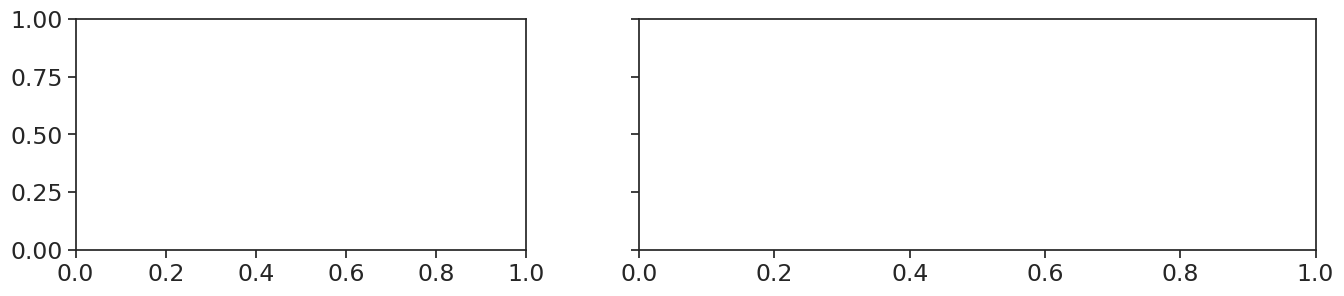

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for illustration

# Define bins for each dataset independently
bins_generics = [x / 2 for x in range(1, int(df_final[df_final['dataset'] == 'generics']['dependency_dist'].max() * 2) + 1)]
bins_rocstories = [x / 2 for x in range(0, int(df_final[df_final['dataset'] == 'rocstories']['dependency_dist'].max() * 2) + 1)]
print('bins_generics', bins_generics)
print('max generics dpdc dist: ', int(df_final[df_final['dataset'] == 'generics']['dependency_dist'].max()))
print('bins_rocstories', bins_rocstories)
print('max rocstories dpdc dist: ', int(df_final[df_final['dataset'] == 'rocstories']['dependency_dist'].max()))

# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "ablation", "shap", "svsampling", "partition", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df = df_final.copy()
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'ablation': 'FeatureAblation', 'shap': 'NaiveShap', 'svsampling': 'ShapleyValuesSampling', 'partition': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "NaiveShap": pal[1], "Partition": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4], "ShapleyValuesSampling": pal[5], "FeatureAblation": pal[6]} 

legend_order = ["Random", "LIME", "FeatureAblation", "NaiveShap", "ShapleyValuesSampling", "Partition", "SyntaxShap", "SyntaxShap-W"]


# Create bins for each dataset
df_generics = df[df['dataset'] == 'generics']
df_generics['dependency_dist_bin'] = pd.cut(df_generics['dependency_dist'], bins=bins_generics)
df_generics = df_generics.groupby(['algorithm', 'dataset', 'dependency_dist_bin']).mean().reset_index()

df_rocstories = df[df['dataset'] == 'rocstories']
df_rocstories['dependency_dist_bin'] = pd.cut(df_rocstories['dependency_dist'], bins=bins_rocstories)
df_rocstories = df_rocstories.groupby(['algorithm', 'dataset', 'dependency_dist_bin']).mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16,3), sharey=True, gridspec_kw={'width_ratios': [1, 1.5]})

# Adjusting various parameters
# Plotting with Seaborn
sns.set(style="whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 17, "ytick.labelsize" : 17})

# Creating a lineplot for each score
df_generics['dependency_dist_bin'] = df_generics['dependency_dist_bin'].astype(str)
sns.lineplot(x='dependency_dist_bin', y='prob_diff_at_k', hue='algorithm', data=df_generics, ax=axes[0], palette=dict_color, linewidth=2)
axes[0].set_title('Generics dataset', fontsize=17)
axes[0].set_xlabel(None)
axes[0].set_ylabel('Div@10', fontsize=17, labelpad=15)
axes[0].tick_params(axis='both', which='major', labelsize=13, pad=10)
axes[0].set_ylim(0.2, 0.8)
axes[0].tick_params(axis='x', rotation=30) 

df_rocstories['dependency_dist_bin'] = df_rocstories['dependency_dist_bin'].astype(str)
sns.lineplot(x='dependency_dist_bin', y='prob_diff_at_k', hue='algorithm', data=df_rocstories, ax=axes[1], palette=dict_color, linewidth=2)
axes[1].set_title('Rocstories dataset', fontsize=17)
axes[1].set_xlabel(None)
axes[1].set_ylabel('Div@10', fontsize=17, labelpad=15)
axes[1].tick_params(axis='both', which='major', labelsize=13, pad=10)
axes[1].tick_params(axis='x', rotation=30) 

# Change x-axis labels
axes[0].set_xticklabels([r'$0.5\leq d<1$', r'$1\leq d<1.5$', r'$1.5\leq d<2$', r'$2\leq d<2.5$', r'$2.5\leq d<3$'])
axes[1].set_xticklabels([r'$0\leq d<0.5$', r'$0.5\leq d<1$', r'$1\leq d<1.5$', r'$1.5\leq d<2$', r'$2\leq d<2.5$', r'$2.5\leq d<3$', r'$3\leq d<3.5$'])

fig.supxlabel("Dependency distance range", fontsize=17, x=0.5, y=-0.4)

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
handles, labels = axes[1].get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order]
ordered_labels = [label for label in legend_order]
legend = axes[1].legend(ordered_handles, ordered_labels, title='', loc='upper left', bbox_to_anchor=(1.1, 1.1), fontsize=16, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('17')

sns.despine()
#fig.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/scores_{model_name}_dependency_dist_lineplot.pdf", bbox_inches='tight', dpi=600)
plt.show()
